In [24]:
import pickle
with open('/home/gamal/vsc/DiffusionSpeech2Face/checkpoint/noablation/loss_total_1.picke', 'rb') as handle:
    loss_list = pickle.load(handle)

In [25]:
len(loss_list)

6689

In [42]:
with open('correct.picke', 'wb') as handle:
    pickle.dump(loss_list, handle)

In [38]:
6689 - 6667

22

In [39]:
del loss_list[-22:]

In [41]:
loss_list[6666::]

[[762817, 0.01910052530001849]]

In [16]:
y_val = [x[1] for x in loss_list]
x_val = [x[0] for x in loss_list]

In [17]:
loss_list = y_val

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


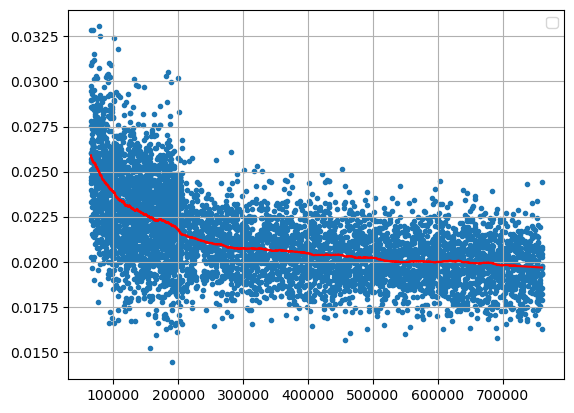

[1000 1001 1002 ... 6649 6650 6651]


In [23]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np
import math

plt.plot(x_val[1000::],loss_list[1000::],'.',zorder=-100)
yhat = savgol_filter(loss_list, 500, 1)



#mm = np.array(loss_list[1000:math.floor(len(loss_list) / 10 ** 3) * 10 ** 3:]).reshape(-1, 100).max(axis=1)
#print(mm)
#max_x = np.argsort(mm, axis=0)[-10:]
#print(max_x)
#max_y = np.take(loss_list[1000::], max_x)
#order = np.argsort(max_x)
#plt.plot(max_x[order] + 1000,max_y[order],'r')
#print(max_x)
#print(max_y)

#plt.axvline(x=1000,linestyle='--',color='green',label='100 inner epochs')
#plt.axvline(x=17000,linestyle='--',color='purple',label='1000 inner epochs')
#plt.axvline(x=23100,linestyle='--',color='purple',label='1st epoch')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.plot(x_val[1000::],yhat[1000::],'r')
plt.grid()
plt.show()

print(np.arange(len(loss_list[1000::])) + 1000)


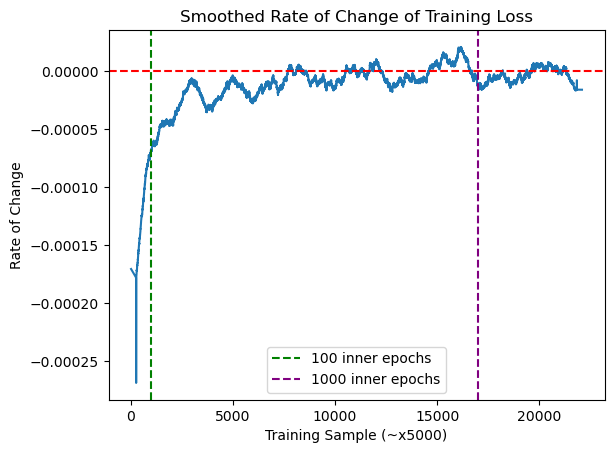

In [147]:
import pandas as pd
import numpy as np
dask_chunk = 5000

smoothed = yhat[1000::]
smoothed = savgol_filter(smoothed, 500, 1)
price_series = pd.Series(smoothed)
price_series = price_series.pct_change().to_numpy()
plt.plot(price_series)
plt.axhline(linestyle='--',color='red')
plt.axvline(x=1000,linestyle='--',color='green',label='100 inner epochs')
plt.axvline(x=17000,linestyle='--',color='purple',label='1000 inner epochs')
plt.legend(loc = 'lower center')
plt.title("Smoothed Rate of Change of Training Loss")
plt.xlabel("Training Sample (~x" + str(int(dask_chunk)) + ")")
plt.ylabel("Rate of Change")
plt.show()


In [1]:
import pickle
with open('med/old.picke', 'rb') as handle:
    loss_list = pickle.load(handle)

In [2]:
len(loss_list)

837

In [30]:
loss_list = loss_list[0::20]
len(loss_list)

42

In [31]:
with open('med/imagen_features_low_res_asis_8_24s.ptloss_total_1.picke2', 'wb') as handle:
    pickle.dump(loss_list, handle)

In [33]:
import pickle
with open('imagen_features_low_res_asis_8_24s.ptloss_total_1.picke', 'rb') as handle:
    loss_list = pickle.load(handle)
    print(len(loss_list))

42


In [1]:
import numpy as np

import pandas as pd

import dask.dataframe as dd

import dask.array as da

import dask.bag as db

In [3]:
d = {'col1': [0,5,10,15], 'col2': [1,6,11,16], 'col3':[2,7,12,-1]}

df = pd.DataFrame(data=d)

df = dd.from_pandas(df, npartitions=2)

df

,col1,col2,col3
npartitions=2,,,
0,int64,int64,int64
2,...,...,...
3,...,...,...


In [4]:

df["image_guide"] = np.nan
df.compute()

,col1,col2,col3,image_guide
0,0,1,2,NaN
1,5,6,7,NaN
2,10,11,12,NaN
3,15,16,-1,NaN


In [11]:
data5 = np.array(df['col1']).astype('int')
data5

array([ 0,  5, 10, 15])

In [259]:
df.set_index("col3")
df.repartition(npartitions=2)
df.compute()

,col1,col2,col3,image_guide
0,0,1,2,NaN
1,5,6,7,NaN
2,10,11,12,NaN
3,15,16,-1,NaN


In [29]:
df = df.sample(frac=1).reset_index(drop=True)
df.compute()

,col1,col2,image_guide
0,1,3,NaN
0,2,4,NaN


In [30]:
data_frame = df[["col1","col2"]]
data_frame.compute()

,col1,col2
0,1,3
0,2,4


In [31]:
meta_df = pd.DataFrame(columns=["x", "y","z"], dtype=int)
meta_df

,x,y,z


In [32]:
def speaker_emb_preprocess(x):
    return x*x*x

data_frame['col3'] = data_frame['col1'].apply(lambda x: speaker_emb_preprocess(x),meta=('1', 'object'))
data_frame

,col1,col2,col3
npartitions=2,,,
,int64,int64,object
,...,...,...
,...,...,...


In [33]:
meta_df = pd.DataFrame([[1,2,4],[1,4,5]], dtype=int)
type("meta_df")

str

In [34]:
type(np.zeros((1,768)).tolist())

list

In [35]:
data_frame = data_frame.drop(['col1'], axis=1)
data_frame

,col2,col3
npartitions=2,,
,int64,object
,...,...
,...,...


In [36]:
data_frame[['col2','col3']]

,col2,col3
npartitions=2,,
,int64,object
,...,...
,...,...


In [37]:
np.array(data_frame["col2"])

array([3, 4])

In [38]:
for index, row in data_frame.iterrows():
    print(row['col2'])

3
4


In [39]:
data_frame.loc[1,"col2"]=2

TypeError: '_LocIndexer' object does not support item assignment

In [ ]:
from matplotlib import pyplot as plt
x = []
x.append(0)
x.append(1)
x.append(2)
x

In [ ]:
fig = plt.figure()
plt.plot(range(10))

plt.title("Training Loss")
plt.xlabel("Training Sample (x500)")
plt.ylabel("MSE Loss")
fig.savefig("save_file_name.png")
plt.close()

In [ ]:
import random
# For a single Element
random.choices([True, False], weights=[100, 0])[0]

In [ ]:
from PIL import Image
import numpy as np


image_size = 128

def make_square(im, min_size=128, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    im.close()
    return new_im

def image_guide_preprocess_low_res_dummy(path):
    #print(face_id)

    image_guide = np.zeros((1, 768))
    return image_guide

def image_guide_preprocess_low_res(path):
    #print(face_id)


    if(False): #never
        image_guide = np.zeros((49, 768))
        #print(image_guide.shape)
    else:

        image = Image.open(path).convert('RGB')

        #print(image.size)

        w_s = image_size / (1+2 * 0.4)
        h_s = image_size / (1+2 * 0.4)

        image = image.crop((0.2*w_s, 0.0*h_s, 1.6*w_s, 1.4*h_s))
        image = image.resize((128,128))
        print(image.size)
        #image = im

        #image = image.resize((16,16))
        im = image
        

        print('saving')
        image.save('opop.png')

        #print(np.array(image,np.float32).shape)

        pix = np.array(image, np.float32)
        pix = np.moveaxis(pix, -1, 0)

        pix = pix / 255
        image.close()
        im.close()
        return pix.tolist()
    return image_guide


In [ ]:
im = '/media/gamal/Passport/Datasets/VoxCeleb2Test/Voxceleb2TestFaces/mp4/id01106/45TAeIEqhcU/00001_face_1.png'

In [ ]:
print(im)

In [ ]:
image_guide_preprocess_low_res(im)

In [ ]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [51]:
from itertools import islice
import csv
import sys
import os
import glob
csv.field_size_limit(sys.maxsize)
class CsvDataset(Dataset):

    def __init__(self, csv_folder):

        self.csv_folder = csv_folder

    def __len__(self):
        _, _, files = next(os.walk(self.csv_folder))
        file_count = len(files)
        print('found ' + str(file_count) + ' files.')
        return file_count

    def __getitem__(self, index):
        file = sorted(glob.glob(self.csv_folder + '*.csv'))[index]
        df = pd.read_csv(file)
        print(df.head(1))
        df['INPUT'] = np.fromstring(s[1:-1], dtype=np.int, sep=' ')
        #df['INPUT'] = df['INPUT'].astype('numpy.ndarray')
        print(df['INPUT'][0])
        torch_tensor = torch.tensor(df.head(1).values)
        return torch_tensor

In [52]:
face_dataset = CsvDataset(csv_folder='train/')

In [53]:
train_loader = torch.utils.data.DataLoader(face_dataset,
        batch_size=1)

In [54]:
for x in train_loader:
    print(x)
    break

found 1 files.
   Unnamed: 0                                              INPUT  \
0           0  [[0. 0. 0. ... 0. 0. 1.]\n [0. 0. 0. ... 0. 0....   

                                          image_path  \
0  [[[0.23921569 0.23921569 0.23921569 ... 0.3019...   

                                       low_res_image  
0  [[[0.24313726 0.6313726  0.6784314  0.7529412 ...  


TypeError: data type 'numpy.ndarray' not understood

In [70]:
names = np.arange(10)
charar = np.chararray((1, 10))
charar[:] = 'i'
names = charar.astype('str') + names.astype('str')
meta_df = pd.DataFrame(columns=names.astype(str), dtype=int)
meta_df

,"(i0, i1, i2, i3, i4, i5, i6, i7, i8, i9)"


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U21')

In [8]:
lr_lambda = lambda step: 1.0

a = np.aran
lr_lambda(3)

NameError: name 'np' is not defined

In [7]:
fff = [[1,2],[2,3]]

In [13]:
x_val = [x[1] for x in fff]
x_val

[2, 3, 22]

In [11]:
fff.append([11,22])
fff

[[1, 2], [2, 3], [11, 22]]

In [21]:
UNET = 1
model_filename = '/media/gamal/Passport/checkpoint/noablation'
from pathlib import Path
import pickle
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

if(UNET == 1):
    my_file = Path(model_filename + '/loss_total_1.picke')
    if my_file.is_file():
        with open(model_filename + '/loss_total_1.picke', 'rb') as handle:
            loss_total = pickle.load(handle)
    else:
        loss_total = []
else:
    my_file = Path(model_filename + '/loss_total_2.picke')
    if my_file.is_file():
        with open(model_filename + '/loss_total_2.picke', 'rb') as handle:
            loss_total = pickle.load(handle)
    else:
        loss_total = []

#print(loss_list)
#print(loss_total)


#print(loss_total)
x_val = [x[0] for x in loss_total]
y_val = [x[1] for x in loss_total]

In [23]:
y_val

[0.8911876194179058,
 0.7999346889555454,
 0.8537470139563084,
 0.7711716834455729,
 0.8232662603259087,
 0.7347892560064793,
 0.7516805175691843,
 0.7773085813969374,
 0.7015355862677097,
 0.6758643612265587,
 0.6007436234503984,
 0.6061839666217566,
 0.4894444076344371,
 0.42927634343504906,
 0.4027000442147255,
 0.36129788495600224,
 0.3116556415334344,
 0.26066588424146175,
 0.28484330140054226,
 0.37355291470885277,
 0.22235299739986658,
 0.26791768334805965,
 0.2272719694301486,
 0.2319795759394765,
 0.18687127763405442,
 0.19665296701714396,
 0.1882832869887352,
 0.17905147140845656,
 0.16436071507632732,
 0.15766430227085948,
 0.1517795091494918,
 0.1472784816287458,
 0.1341643687337637,
 0.13444533525034785,
 0.14589114440605044,
 0.13988698413595557,
 0.14999722316861153,
 0.12589075695723295,
 0.1194712808355689,
 0.12022729963064194,
 0.11880913423374295,
 0.11935455817729235,
 0.11919081537052989,
 0.11077925702556968,
 0.11163061577826738,
 0.11463105445727706,
 0.1222746

In [25]:
x_val[10::]

[1129,
 1137,
 1142,
 1156,
 1165,
 2031,
 2040,
 2049,
 2063,
 2074,
 2084,
 2095,
 2103,
 2115,
 2125,
 2136,
 2148,
 2159,
 2169,
 2178,
 2192,
 3054,
 3066,
 3077,
 3085,
 3098,
 3112,
 3116,
 3127,
 3135,
 3143,
 3158,
 3172,
 3178,
 3188,
 3200,
 3211,
 4082,
 4095,
 4108,
 4119,
 4126,
 4138,
 4151,
 4163,
 4167,
 4181,
 4193,
 4204,
 4210,
 4223,
 4236,
 4248,
 5104,
 5118,
 5122,
 5134,
 5148,
 5160,
 5163,
 5176,
 5188,
 5202,
 5205,
 5218,
 5224,
 5234,
 5248,
 5260,
 6129,
 6140,
 6148,
 6158,
 6172,
 6183,
 6191,
 6202,
 6212,
 6224,
 6229,
 6240,
 6254,
 6267,
 6278,
 6285,
 7155,
 7166,
 7175,
 7185,
 7197,
 7211,
 7222,
 7231,
 7242,
 7255,
 7258,
 7269,
 7283,
 7296,
 7301,
 7313,
 8180,
 8188,
 8196,
 8206,
 8217,
 8231,
 8240,
 8252,
 8258,
 8270,
 8281,
 8293,
 8304,
 8313,
 8324,
 8338,
 9198,
 9210,
 9221,
 9232,
 9238,
 9250,
 9259,
 9270,
 9279,
 9286,
 9298,
 9307,
 9319,
 9332,
 9340,
 9349]

In [27]:

fig = plt.figure()
plt.plot(x_val[10::],np.arange(len(y_val[10::])) + 10,y_val[10::]
        ,'.',zorder=-100)

#plt.axvline(x=1000,linestyle='--',color='green',label='1000 inner epochs')
#plt.axvline(x=17000,linestyle='--',color='purple',label='100 inner epochs - 100000 unique samples seen' )
#plt.axvline(x=23100,linestyle='-.',color='black',label='1 inner epoch - end of 1st epoch ')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.grid()
yhat = savgol_filter(y_val, 100, 3)
#plt.plot(x_val,yhat[10::],'r')
plt.title("Training Loss")
plt.xlabel("Training Sample")
plt.ylabel("MSE Loss")



plt.show()


plt.close()


SyntaxError: invalid syntax (318621653.py, line 10)